1. Скачайте датасет House Prices Kaggle со страницы конкурса (https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) и сохраните его в том же каталоге, что и ваш скрипт или блокнот Python.
2. Загрузите датасет в pandas DataFrame под названием df.

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
df = pd.read_csv('house prices.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


3. Выполните предварительную обработку данных, выполнив следующие шаги: a. Определите и обработайте отсутствующие значения в датасете. Определите, в каких столбцах есть отсутствующие значения, и решите, как их обработать (например, заполнить средним, медианой или модой, или отбросить столбцы/строки с существенными отсутствующими значениями). b. Проверьте и обработайте любые дублирующиеся строки в датасете. c. Проанализируйте типы данных в каждом столбце и при необходимости преобразуйте их (например, из объектных в числовые типы).

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [83]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [84]:
df.drop(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis= 1 , inplace= True)

In [85]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 75, dtype: int64

In [86]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [87]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [88]:
df.shape

(1460, 75)

In [89]:
df = df.drop_duplicates()

In [90]:
df.shape

(1460, 75)

4. Проведите разведочный анализ данных (EDA), ответив на следующие вопросы: a. Каково распределение целевой переменной 'SalePrice'? Есть ли какие-либо выбросы? b. Исследуйте взаимосвязи между целевой переменной и другими характеристиками. Есть ли сильные корреляции? c. Исследуйте распределение и взаимосвязи других важных характеристик, таких как 'OverallQual', 'GrLivArea', 'GarageCars' и т.д. d. Визуализируйте данные, используя соответствующие графики (например, гистограммы, диаграммы рассеяния, квадратные диаграммы), чтобы получить представление о датасете.

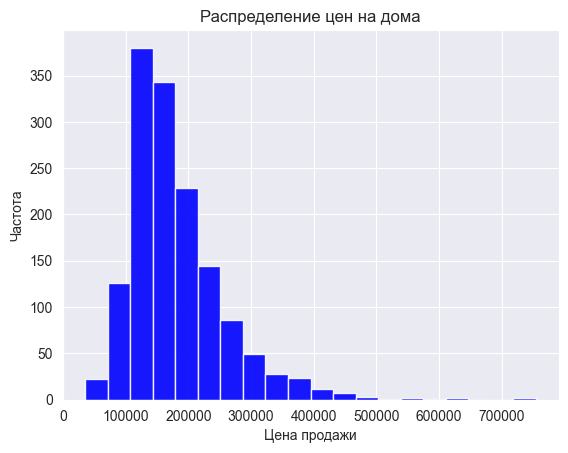

In [91]:
plt.hist(df['SalePrice'], bins=20, color='blue', alpha=0.9)
plt.xlabel('Цена продажи')
plt.ylabel('Частота')
plt.title('Распределение цен на дома')
plt.show()

In [92]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

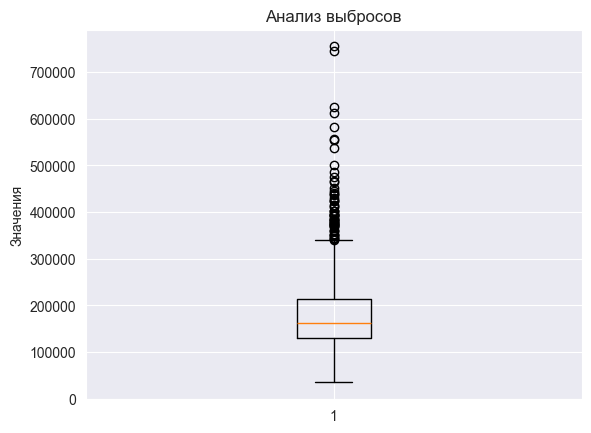

In [93]:
plt.boxplot(df['SalePrice'])
plt.ylabel('Значения')
plt.title('Анализ выбросов')
plt.show()

In [94]:

from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df['SalePrice']))
threshold = 3
outliers = df['SalePrice'][z > threshold]
outliers

58      438780
178     501837
185     475000
349     437154
389     426000
440     555000
473     440000
496     430000
527     446261
591     451950
664     423000
691     755000
769     538000
798     485000
803     582933
898     611657
1046    556581
1142    424870
1169    625000
1182    745000
1243    465000
1373    466500
Name: SalePrice, dtype: int64

Вывод: Выбросы по цене продажи дома начинаются на значении 350 000

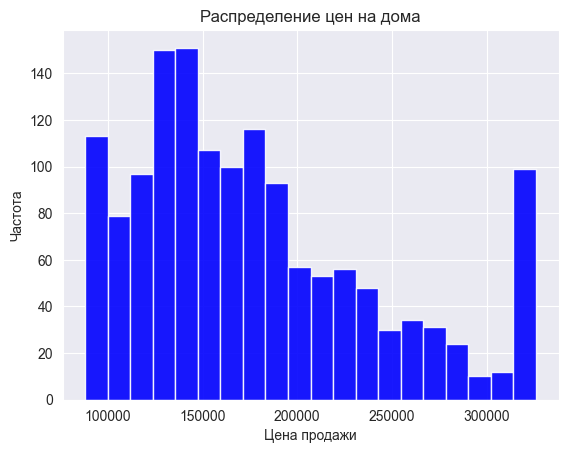

In [95]:
from scipy.stats.mstats import winsorize

df['SalePrice'] = winsorize(df['SalePrice'], limits=[0.05, 0.05])
plt.hist(df['SalePrice'], bins=20, color='blue', alpha=0.9)
plt.xlabel('Цена продажи')
plt.ylabel('Частота')
plt.title('Распределение цен на дома')
plt.show()

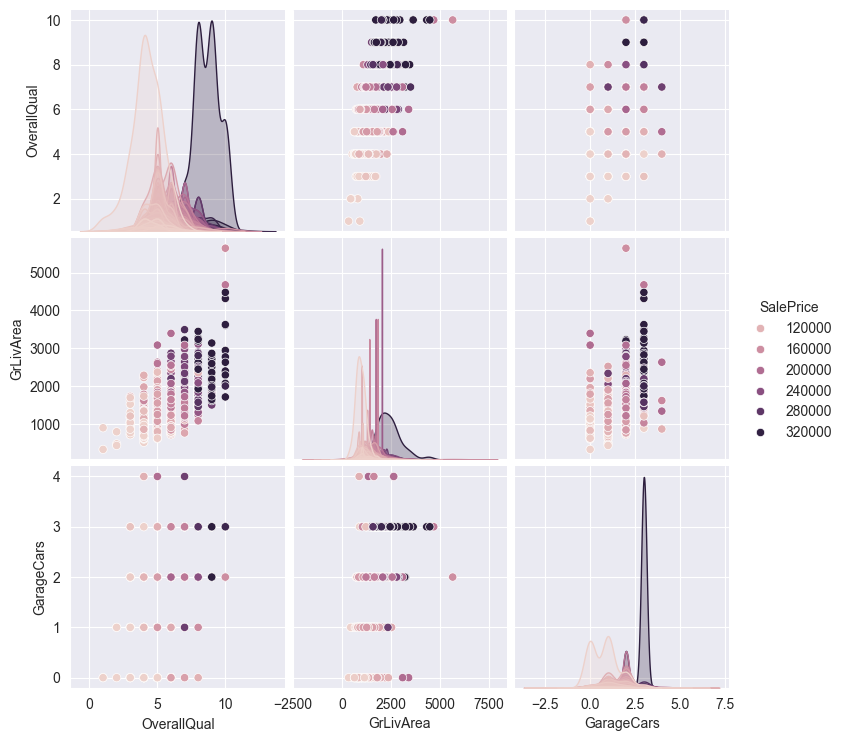

In [96]:
price_cor = df[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars']]
sns.pairplot(price_cor, hue='SalePrice')

In [97]:
import numpy as np

Коэффициент корреляции: 0.8123694588891861


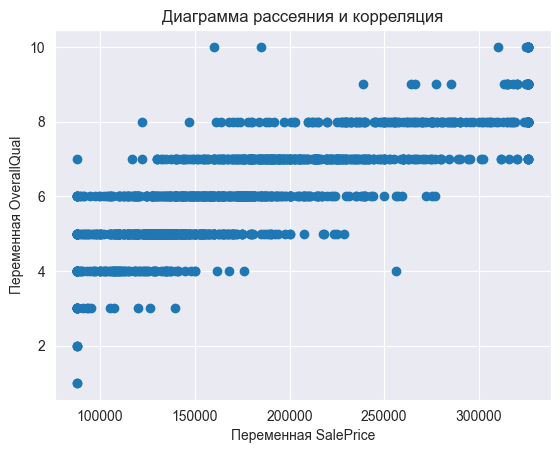

In [98]:
correlation = np.corrcoef(df['SalePrice'], df['OverallQual'])[0, 1]
print("Коэффициент корреляции:", correlation)
plt.scatter(df['SalePrice'], df['OverallQual'])
plt.xlabel('Переменная SalePrice')
plt.ylabel('Переменная OverallQual')
plt.title('Диаграмма рассеяния и корреляция')
plt.show()

Коэффициент корреляции: 0.6975571229957146


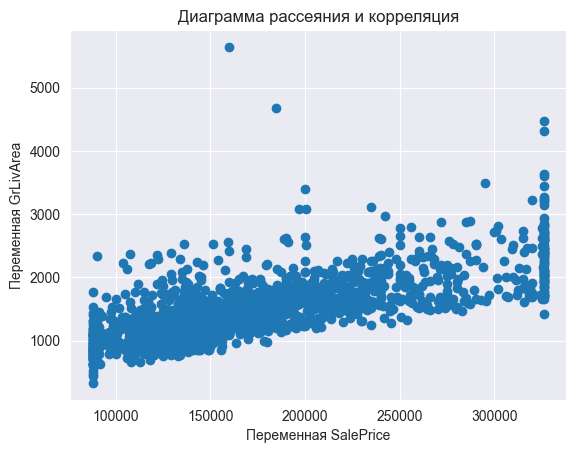

In [99]:
correlation = np.corrcoef(df['SalePrice'], df['GrLivArea'])[0, 1]
print("Коэффициент корреляции:", correlation)
plt.scatter(df['SalePrice'], df['GrLivArea'])
plt.xlabel('Переменная SalePrice')
plt.ylabel('Переменная GrLivArea')
plt.title('Диаграмма рассеяния и корреляция')
plt.show()

Коэффициент корреляции: 0.668590913490186


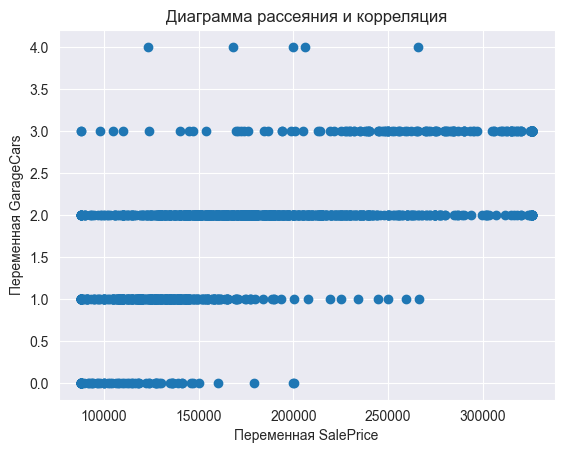

In [100]:
correlation = np.corrcoef(df['SalePrice'], df['GarageCars'])[0, 1]
print("Коэффициент корреляции:", correlation)
plt.scatter(df['SalePrice'], df['GarageCars'])
plt.xlabel('Переменная SalePrice')
plt.ylabel('Переменная GarageCars')
plt.title('Диаграмма рассеяния и корреляция')
plt.show()

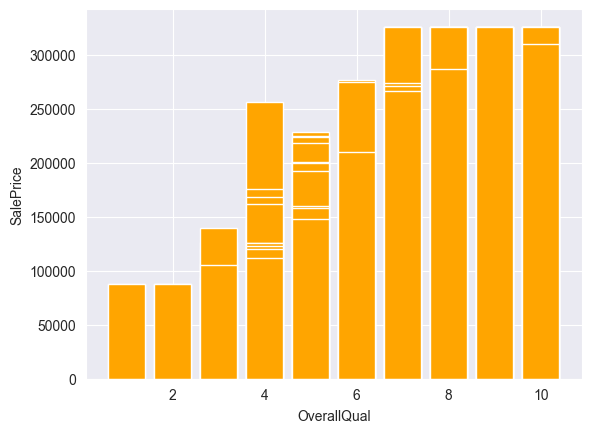

In [101]:
plt.bar(df['OverallQual'], df['SalePrice'], color='orange')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()

Вывод: Наибольшая кореляция SalePrice с OverallQual

5. Выполните проектирование признаков путем реализации следующих преобразований: a. Работайте с категориальными переменными, применяя one-hot encoding или label encoding, в зависимости от характера переменной. b. При необходимости создайте новые характеристики, такие как общая площадь или возраст объекта недвижимости, путем объединения существующих характеристик.

In [102]:
from sklearn.preprocessing import LabelEncoder
df = pd.get_dummies(df, columns=['OverallQual'], prefix='OverallQual')
le = LabelEncoder()
df['ExterQual'] = le.fit_transform(df['ExterQual'].astype(str))
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OverallQual_1,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,False,False,False,False,False,False,True,False,False,False
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,False,False,False,False,False,True,False,False,False,False
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,False,False,False,False,False,False,True,False,False,False
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,False,False,False,False,False,False,True,False,False,False
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,False,False,False,False,False,False,False,True,False,False


In [103]:
pivot_table = df.pivot_table(index='SalePrice', columns='OverallCond', values='LotArea', aggfunc='mean', fill_value = 0)
pivot_table

OverallCond,1,2,3,4,5,6,7,8,9
SalePrice,,,,,,,,,
88000,10020.0,8096.75,8071.583333,7299.769231,7096.285714,5487.00,6465.444444,4153.0,0.0
89000,0.0,0.00,0.000000,0.000000,0.000000,0.00,6000.000000,0.0,0.0
89471,0.0,0.00,0.000000,0.000000,0.000000,0.00,5925.000000,0.0,0.0
89500,0.0,0.00,1680.000000,0.000000,0.000000,0.00,7920.000000,0.0,0.0
90000,0.0,0.00,0.000000,0.000000,10530.333333,0.00,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...
324000,0.0,0.00,0.000000,0.000000,10846.000000,0.00,0.000000,0.0,0.0
325000,0.0,0.00,0.000000,0.000000,12209.000000,0.00,0.000000,0.0,13500.0
325300,0.0,0.00,0.000000,0.000000,14215.000000,0.00,0.000000,0.0,0.0


6. Сохраните очищенный и преобразованный набор данных в новый CSV-файл под названием 'cleaned_house_prices.csv'.

In [104]:
df.to_csv('cleaned_house_prices.csv', index=False)